# Fixed array size, variable number of versions

For this test, we have generated `.h5` data files using the `generate_data.py` script from the repository, using the following options:

- `test_large_fraction_changes_sparse`: 
    - `num_rows_initial = 5000`
    - `num_rows_per_append = 10`
    - `pct_inserts = 1`
    - `num_inserts = 10`
    - `pct_deletes = 1`
    - `num_deletes = 10`
    - `pct_changes = 90`
    - `num_changes = 1000`
- `test_small_fraction_changes_sparse`
    - `num_rows_initial = 5000`
    - `num_rows_per_append = 10`
    - `pct_inserts = 1`
    - `num_inserts = 10`
    - `pct_deletes = 1`
    - `num_deletes = 10`
    - `pct_changes = 90`
    - `num_changes = 10`
- `test_mostly_appends_sparse`:
    - `num_rows_initial = 1000`
    - `num_rows_per_append = 1000`
    - `pct_inserts = 5`
    - `num_inserts = 10`
    - `pct_deletes = 1`
    - `num_deletes = 10`
    - `pct_changes = 5`
    - `num_changes = 10`  
- `test_mostly_appends_dense`
    - `num_rows_initial_0 = 30`
    - `num_rows_initial_1 = 30`
    - `num_rows_per_append_0 = 1`
    - `pct_inserts = 5`
    - `num_inserts_0 = 1`
    - `num_inserts_1 = 10`
    - `pct_deletes = 1`
    - `num_deletes_0 = 1`
    - `num_deletes_1 = 1`
    - `pct_changes = 5`
    - `num_changes = 10`

## Setup

The path to the generated test files is

In [1]:
path = "/home/melissa/projects/versioned-hdf5/analysis" # change this as necessary

In [2]:
%matplotlib inline
import os
import sys
sys.path.append('..')
import pickle
import numpy as np
import matplotlib.pyplot as plt
import h5py
from versioned_hdf5 import VersionedHDF5File

In [8]:
# auxiliary code to format file sizes 
def format_size(size):
    suffixes = ['B', 'KB', 'MB', 'GB']
    i = 0
    while size >= 1024 and i < len(suffixes)-1:
        size = size/1024
        i += 1
    return f"{size:.2f} {suffixes[i]}"

# Test 1: Large fraction changes (sparse)

In [ ]:
testname = "test_large_fraction_changes_sparse"

We have tested the following numbers of versions (or transactions):

In [12]:
num_transactions_1 = [50, 100, 500, 1000, 2000, 5000, 10000, 20000]

In [ ]:
tests = []
for t in num_transactions_1:
    filename = os.path.join(path, testname+"_"+str(t)+".h5")
    h5pyfile = h5py.File(os.path.join(path, testname+"_"+str(t)+".h5"), 'r')
    data = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=t, filename=filename, h5pyfile=h5pyfile, data=data))

## Number of versions v. File size

We'll start by analyzing how the `.h5` file sizes grow as the number of versions grows. 

In [ ]:
for test in tests:
    test['size'] = os.path.getsize(test['filename'])
    test['size_label'] = format_size(test['size'])
    print(f"File with {test['num_transactions']} versions has size {test['size_label']}")

Note that the array size also grows as the number of versions grows:

In [ ]:
print("Array sizes:")
for test in tests:
    lengths = []
    for vname in test['data']._versions:
        if vname != '__first_version__':
            version = test['data'][vname]
            group_key = list(version.keys())[0]
            lengths.append(len(version[group_key]['val']))
    print(f"File with {test['num_transactions']}: min = {min(lengths)}, max = {max(lengths)}")

```
Array sizes:
File with 50: min = 5000, max = 5567
File with 100: min = 5000, max = 5952
File with 500: min = 5000, max = 10263
File with 1000: min = 5000, max = 15601
File with 2000: min = 5000, max = 26057
File with 5000: min = 5000, max = 57937
File with 10000: min = 5000, max = 110305
File with 20000: min = 5000, max = 215739
```

In [ ]:
test_large_fraction_changes_sparse = []
for test in tests:
    test_large_fraction_changes_sparse.append(dict((k, test[k]) for k in ['num_transactions', 'filename', 'size', 'size_label']))

Just for the sake of reproducibility, we'll pickle the filesizes for these tests so we can recover them later:

In [ ]:
with open("test_large_fraction_changes_sparse_versions.pickle","wb") as pickle_out:
    pickle.dump(test_large_fraction_changes_sparse, pickle_out)

In [9]:
with open("test_large_fraction_changes_sparse_versions.pickle", "rb") as pickle_in:
    test_large_fraction_changes_sparse = pickle.load(pickle_in)

Let's show the size information in a graph:

In [10]:
filesizes_1 = np.array([test['size'] for test in test_large_fraction_changes_sparse])
sizelabels_1 = np.array([test['size_label'] for test in test_large_fraction_changes_sparse])

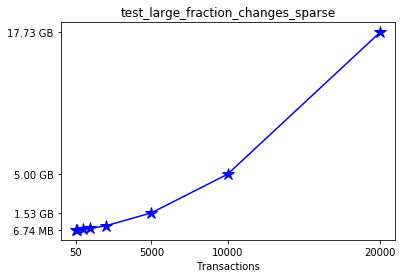

In [13]:
fig_large_fraction_changes = plt.figure()
plt.plot(num_transactions_1, filesizes_1, 'b')
plt.plot(num_transactions_1, filesizes_1, 'b*', ms=12)
plt.xticks([50, 5000, 10000, 20000])
plt.xlabel("Transactions")
plt.title("test_large_fraction_changes_sparse")
plt.yticks(filesizes_1[[0, 5, 6, 7]], sizelabels_1[[0, 5, 6, 7]])
plt.show()

## Test 1: Large Fraction Changes (Sparse)

![Test 1: Large Fraction Changes (Sparse)](test_large_fraction_changes_sparse_versions.png)

This shows that the file size grows **quadratically** with respect to the number of versions added for this array size.

### Finishing up

In [ ]:
for test in tests:
    test['h5pyfile'].close()

# Test 2: Mostly appends (sparse)

In [ ]:
testname = "test_mostly_appends_sparse"

For this case, we are using the following number of transactions:

In [14]:
num_transactions_2 = [50, 100, 500, 1000, 2000, 5000, 10000]

In [ ]:
# Setting up dictionary with test info
tests = []
for t in num_transactions_2:
    filename = os.path.join(path, testname+"_"+str(t)+".h5")
    h5pyfile = h5py.File(os.path.join(path, testname+"_"+str(t)+".h5"), 'r')
    data = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=t, filename=filename, h5pyfile=h5pyfile, data=data))

# Computing file sizes
for test in tests:
    test['size'] = os.path.getsize(test['filename'])
    test['size_label'] = format_size(test['size'])
    print(f"File with {test['num_transactions']} versions has size {test['size_label']}")

In [ ]:
print("Array sizes:")
for test in tests:
    lengths = []
    for vname in test['data']._versions:
        if vname != '__first_version__':
            version = test['data'][vname]
            group_key = list(version.keys())[0]
            lengths.append(len(version[group_key]['val']))
    print(f"File with {test['num_transactions']}: min = {min(lengths)}, max = {max(lengths)}")

```
Array sizes:
File with 50: min = 1000, max = 50933
File with 100: min = 1000, max = 100857
File with 500: min = 1000, max = 500951
File with 1000: min = 1000, max = 1000660
File with 2000: min = 1000, max = 2000840
File with 5000: min = 1000, max = 5001604
File with 10000: min = 1000, max = 10000126
```

In [ ]:
test_mostly_appends_sparse = []
for test in tests:
    test_mostly_appends_sparse.append(dict((k, test[k]) for k in ['num_transactions', 'filename', 'size', 'size_label']))

In [ ]:
with open("test_mostly_appends_sparse_versions.pickle","wb") as pickle_out:
    pickle.dump(test_mostly_appends_sparse, pickle_out)

In [15]:
with open("test_mostly_appends_sparse_versions.pickle", "rb") as pickle_in:
    test_mostly_appends_sparse = pickle.load(pickle_in)

In [16]:
filesizes_2 = np.array([test['size'] for test in test_mostly_appends_sparse])
sizelabels_2 = np.array([test['size_label'] for test in test_mostly_appends_sparse])

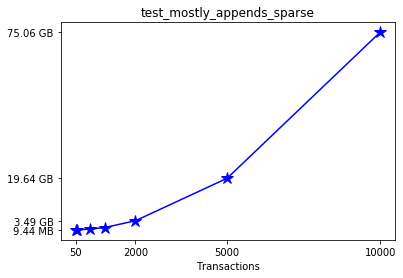

In [17]:
fig_mostly_appends_sparse = plt.figure()
plt.plot(num_transactions_2, filesizes_2, 'b')
plt.plot(num_transactions_2, filesizes_2, 'b*', ms=12)
plt.xticks([50, 2000, 5000, 10000])
plt.xlabel("Transactions")
plt.title("test_mostly_appends_sparse")
plt.yticks(filesizes_2[[0, 4, 5, 6]], sizelabels_2[[0, 4, 5, 6]])
plt.show()

## Test 2: Mostly Appends (Sparse)

![Test 2: Mostly Appends (Sparse)](test_mostly_appends_sparse_versions.png)

In [ ]:
for test in tests:
    test['h5pyfile'].close()

# Test 3: Small fraction changes sparse

In [ ]:
testname = "test_small_fraction_changes_sparse"

We have tested the following numbers of versions (or transactions):

In [18]:
num_transactions_3 = [50, 100, 500, 1000, 2000, 5000, 10000, 20000]

In [ ]:
# Setting up dictionary with test info:
tests = []
for t in num_transactions_3:
    filename = os.path.join(path, testname+"_"+str(t)+".h5")
    h5pyfile = h5py.File(os.path.join(path, testname+"_"+str(t)+".h5"), 'r')
    data = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=t, filename=filename, h5pyfile=h5pyfile, data=data))
    
# Computing file sizes
for test in tests:
    test['size'] = os.path.getsize(test['filename'])
    test['size_label'] = format_size(test['size'])
    print(f"File with {test['num_transactions']} versions has size {test['size_label']}")

In [ ]:
print("Array sizes:")
for test in tests:
    lengths = []
    for vname in test['data']._versions:
        if vname != '__first_version__':
            version = test['data'][vname]
            group_key = list(version.keys())[0]
            lengths.append(len(version[group_key]['val']))
    print(f"File with {test['num_transactions']}: min = {min(lengths)}, max = {max(lengths)}")

```
Array sizes:
File with 50: min = 5000, max = 5451
File with 100: min = 5000, max = 5996
File with 500: min = 5000, max = 10081
File with 1000: min = 5000, max = 15504
File with 2000: min = 5000, max = 25330
File with 5000: min = 5000, max = 57366
File with 10000: min = 5000, max = 109691
File with 20000: min = 5000, max = 212026
```

In [ ]:
test_small_fraction_changes_sparse = []
for test in tests:
    test_small_fraction_changes_sparse.append(dict((k, test[k]) for k in ['num_transactions', 'filename', 'size', 'size_label']))

In [ ]:
with open("test_small_fraction_changes_sparse_versions.pickle","wb") as pickle_out:
    pickle.dump(test_small_fraction_changes_sparse, pickle_out)

In [19]:
with open("test_small_fraction_changes_sparse_versions.pickle", "rb") as pickle_in:
    test_small_fraction_changes_sparse = pickle.load(pickle_in)

In [20]:
filesizes_3 = np.array([test['size'] for test in test_small_fraction_changes_sparse])
sizelabels_3 = np.array([test['size_label'] for test in test_small_fraction_changes_sparse])

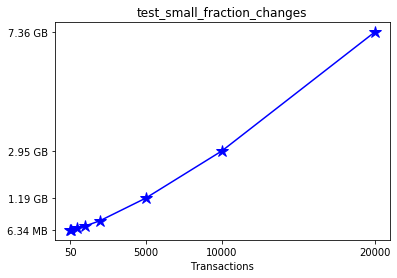

In [21]:
fig_small_fraction_changes = plt.figure()
plt.plot(num_transactions_3, filesizes_3, 'b')
plt.plot(num_transactions_3, filesizes_3, 'b*', ms=12)
plt.xticks([50, 5000, 10000, 20000])
plt.xlabel("Transactions")
plt.title("test_small_fraction_changes")
plt.yticks(filesizes_3[[0, 5, 6, 7]], sizelabels_3[[0, 5, 6, 7]])
plt.show()

## Test 3: Small Fraction Changes (Sparse)

![Test 3: Small Fraction Changes (Sparse)](test_small_fraction_changes_sparse_versions.png)

In [ ]:
for test in tests:
    test['h5pyfile'].close()

# Test 4: Mostly appends (dense)

In [ ]:
testname = "test_mostly_appends_dense"

We have tested the following number of versions (or transactions):

In [22]:
num_transactions_4 = [50, 100, 500, 1000, 2000, 5000, 10000]

In [ ]:
tests = []
for t in num_transactions_4:
    filename = os.path.join(path, testname+"_"+str(t)+".h5")
    h5pyfile = h5py.File(os.path.join(path, testname+"_"+str(t)+".h5"), 'r')
    data = VersionedHDF5File(h5pyfile)
    tests.append(dict(num_transactions=t, filename=filename, h5pyfile=h5pyfile, data=data))
    
for test in tests:
    test['size'] = os.path.getsize(test['filename'])
    test['size_label'] = format_size(test['size'])
    print(f"File with {test['num_transactions']} versions has size {test['size_label']}")

In [ ]:
print("Array sizes:")
for test in tests:
    lengths = []
    for vname in test['data']._versions:
        if vname != '__first_version__':
            version = test['data'][vname]
            group_key = list(version.keys())[0]
            lengths.append(len(version[group_key]['val']))
    print(f"File with {test['num_transactions']}: min = {min(lengths)}, max = {max(lengths)}")

```
Array sizes:
File with 50: min = 900, max = 2760
File with 100: min = 900, max = 6720
File with 500: min = 900, max = 91945
File with 1000: min = 900, max = 425220
File with 2000: min = 900, max = 1615510
File with 5000: min = 900, max = 9819999
File with 10000: min = 900, max = 39638808
```

In [ ]:
test_mostly_appends_dense = []
for test in tests:
    test_mostly_appends_dense.append(dict((k, test[k]) for k in ['num_transactions', 'filename', 'size', 'size_label']))

In [ ]:
with open("test_mostly_appends_dense_versions.pickle","wb") as pickle_out:
    pickle.dump(test_mostly_appends_dense, pickle_out)

In [23]:
with open("test_mostly_appends_dense_versions.pickle", "rb") as pickle_in:
    test_mostly_appends_dense = pickle.load(pickle_in)

In [24]:
filesizes_4 = np.array([test['size'] for test in test_mostly_appends_dense])
sizelabels_4 = np.array([test['size_label'] for test in test_mostly_appends_dense])

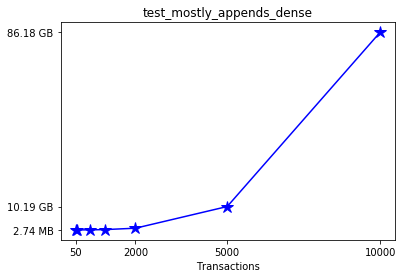

In [25]:
fig_mostly_appends_dense = plt.figure()
plt.plot(num_transactions_4, filesizes_4, 'b')
plt.plot(num_transactions_4, filesizes_4, 'b*', ms=12)
plt.xticks([50, 2000, 5000, 10000])
plt.xlabel("Transactions")
plt.title("test_mostly_appends_dense")
plt.yticks(filesizes_4[[0, 5, 6]], sizelabels_4[[0, 5, 6]])
plt.show()

## Test 4: Mostly Appends (Dense)

![Test 4: Mostly Appends (Dense)](test_mostly_appends_dense_versions.png)

### Finishing up

In [ ]:
for test in tests:
    test['h5pyfile'].close()

# Full comparison

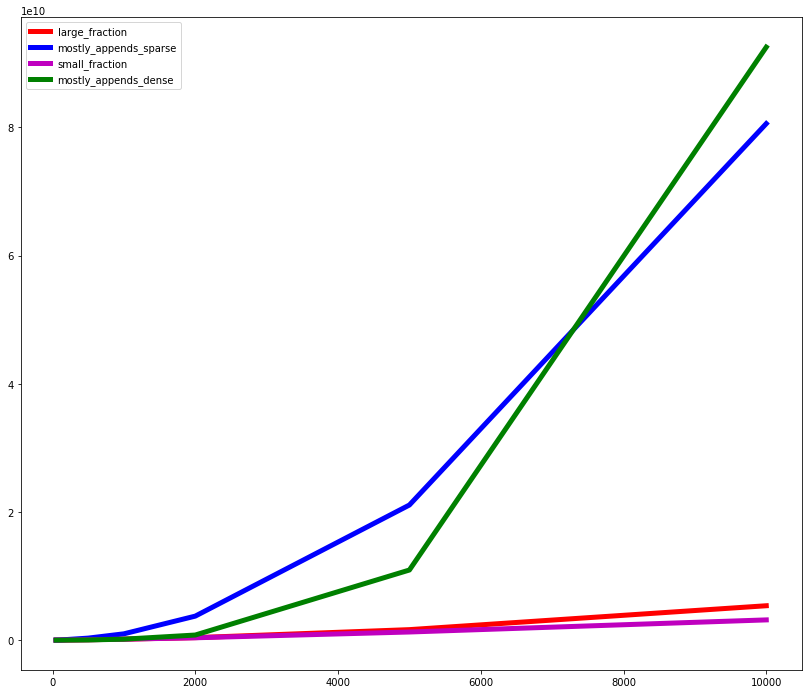

In [30]:
fig_all = plt.figure(figsize=(14, 12))
plt.plot(num_transactions_1[:-1], filesizes_1[:-1], 'r', label = "large_fraction", lw=5)
plt.plot(num_transactions_2, filesizes_2, 'b', label = "mostly_appends_sparse", lw=5)
plt.plot(num_transactions_3[:-1], filesizes_3[:-1], 'm', label = "small_fraction", lw=5)
plt.plot(num_transactions_4, filesizes_4, 'g', label = "mostly_appends_dense", lw=5)
plt.legend()